Get the Data

In [1]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2021-03-06 20:04:16--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601501.us.archive.org/8/items/ages-and-heights/AgesAndHeights.pkl [following]
--2021-03-06 20:04:16--  https://ia601501.us.archive.org/8/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia601501.us.archive.org (ia601501.us.archive.org)... 207.241.227.111
Connecting to ia601501.us.archive.org (ia601501.us.archive.org)|207.241.227.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2021-03-06 20:04:17 (234 MB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



In [2]:
import pandas as pd
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1ed113d10>,
      dtype=object)

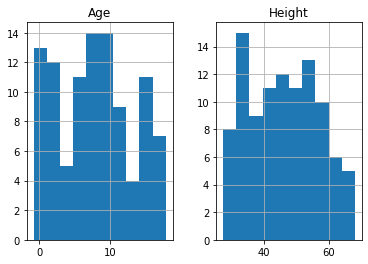

In [3]:
raw_data.hist()

In [4]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [5]:
cleaned_data = raw_data[raw_data['Age'] > 0]

In [6]:
cleaned_data.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


Visualize the Cleaned Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1ea590bd0>,
      dtype=object)

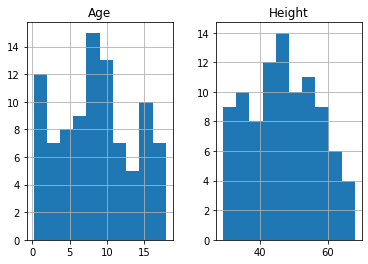

In [7]:
cleaned_data.hist()

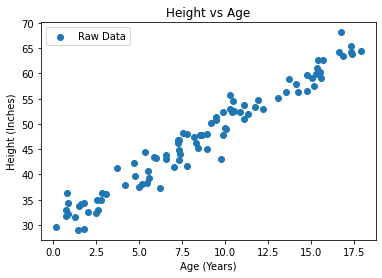

In [8]:
import matplotlib.pyplot as plt
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages, heights, label='Raw Data')
plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')
plt.legend()

Build the Model, and Train it!

$y = \alpha + \beta  x + \epsilon$      (The reality)

$\hat{y} = \alpha + \beta  x$           (Our best guess)



In [10]:
parameters = {'alpha':40, 'beta':4}

In [11]:
def y_hat(age, params):
  alpha = params['alpha']
  beta = params['beta']
  return alpha + beta * age
y_hat(5, parameters)

60

In [12]:
def learn_parameters(data, params):
  x, y = data['Age'], data['Height']
  x_bar, y_bar = x.mean(), y.mean()
  x, y = x.to_numpy(), y.to_numpy()
  beta = sum( ((x-x_bar) * (y-y_bar)) / sum( (x-x_bar)**2))
  alpha = y_bar - beta * x_bar
  params['alpha'] = alpha
  params['beta'] = beta

In [13]:
new_parameters = {'alpha':0, 'beta':0}
learn_parameters(cleaned_data, new_parameters)
new_parameters

{'alpha': 29.961857614615834, 'beta': 2.0014168989106302}

In [14]:
spaced_ages = list(range(18))
spaced_untrained_predictions = [y_hat(x, parameters) for x in spaced_ages]
spaced_untrained_predictions

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108]

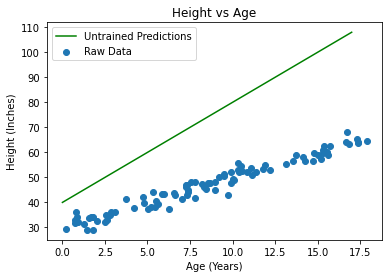

In [15]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages, heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label='Untrained Predictions', color='green')
plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')
plt.legend()

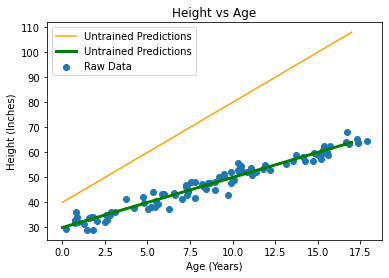

In [16]:
spaced_trained_predictions = [y_hat(x, new_parameters) for x in spaced_ages]
plt.scatter(ages, heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label='Untrained Predictions', color='orange')
plt.plot(spaced_ages, spaced_trained_predictions, label='Untrained Predictions', color='green', lw=3)
plt.title('Height vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Inches)')
plt.legend()

Use the Model - Make some Predictions on UNSEEN data

In [17]:
new_age = 5
y_hat(new_age, new_parameters)

39.968942109168985